## Bagging 和 Pasting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

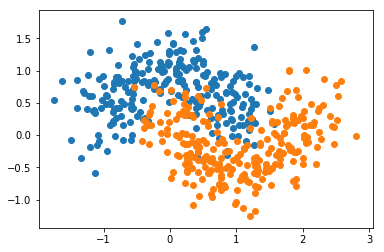

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.85599999999999998

In [6]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

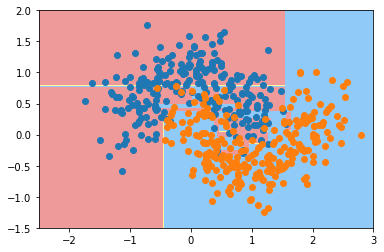

In [7]:
plot_decision_boundary(dt_clf, axis=[-2.5, 3, -1.5, 2])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 使用 Pasting 和 Bagging

In [8]:
from sklearn.ensemble import BaggingClassifier

pasting_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=500, max_samples=100,
                           bootstrap=False)
pasting_clf.fit(X_train, y_train)
pasting_clf.score(X_test, y_test)

0.91200000000000003

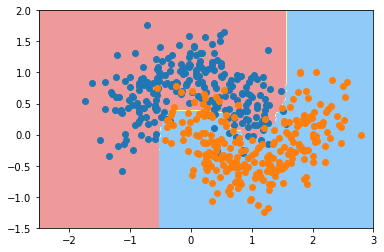

In [9]:
plot_decision_boundary(pasting_clf, axis=[-2.5, 3, -1.5, 2])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [10]:
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=500, max_samples=100,
                           bootstrap=True)
bagging_clf.fit(X_train, y_train)
bagging_clf.score(X_test, y_test)

0.91200000000000003

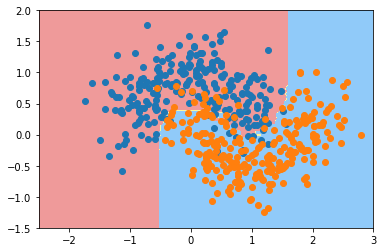

In [11]:
plot_decision_boundary(bagging_clf, axis=[-2.5, 3, -1.5, 2])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()